# Which Star Wars movie is the best? (At least for the people in this survey)
Start wars is a big franchise, having around 11 movies, tv-shows, animated films, etc. But there is a clear difference in between the fans and not fans, of which is the best star wars movie. A lot of fans claim that the best ones are the original trilogy but is that the general public opinion?

In this project, we are going to analyze which is the best movie in the opinion of the public. In order to do this, we are going to use a dataset from a survey carried on by FiveThirtyEight. The dataset that is available [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey), was obtained before the release of Star Wars: The force Awakens, so in here we will only analyze the first 6 Star Wars Movies.  



## Data Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [3]:
star_wars = pd.read_csv('star_wars.csv', encoding="ISO-8859-1")

In [4]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [5]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1187 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          837 non-null    object 
 3   Which of the following Star 

In [6]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

As seen above, there is some work that needs to be done before the analysis, we need to remove null values present in the dataset, give a better format to the columns in the dataframe and condense some information. 

## Data Cleaning

### Null value in RespondebtID
We are going to remove the row with the null value in the RespondentID column.

In [7]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

### Format columns 
The columns 'Have you seen any of the 6 films in the Star Wars franchise?' and 'Do you consider yourself to be a fan of the Star Wars film franchise?' are Yes or No answers, so in order to manipulate the data in a better way, these are going to be transformed into True, False or NaN answers. 

In [8]:
yes_no_map = {
    'Yes': True,
    'No': False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no_map)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no_map)
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some col

The column 'Which of the following Star Wars films have you seen? Please select all that apply.' and the next five denote if the person has seen an specific movie of the saga.

The names of the columns are not very intuitive, so for this reason we are going to change them and assign a boolean values if the person have seen the movie. 

In [9]:
def movie_trans(val):
    if val == 'Star Wars: Episode I  The Phantom Menace': return True
    elif val == 'Star Wars: Episode II  Attack of the Clones': return True
    elif val == 'Star Wars: Episode III  Revenge of the Sith': return True
    elif val == 'Star Wars: Episode IV  A New Hope': return True
    elif val =='Star Wars: Episode V The Empire Strikes Back': return True
    elif val == 'Star Wars: Episode VI Return of the Jedi': return True
    elif np.isnan(val): return False

col = ['Which of the following Star Wars films have you seen? Please select all that apply.', 
      'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']
star_wars[col] = star_wars[col].applymap(movie_trans)


In [10]:
star_wars = star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.': 'Seen_SWI', 
      'Unnamed: 4':'Seen_SWII', 'Unnamed: 5':'Seen_SWIII', 'Unnamed: 6':'Seen_SWIV', 'Unnamed: 7':'Seen_SWV', 'Unnamed: 8':'Seen_SWVI'})
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Seen_SWI,Seen_SWII,Seen_SWIII,Seen_SWIV,Seen_SWV,Seen_SWVI,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The column 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.' and the next five refer to the ranking of each person of the respective Star Wars movies. 

The names of these columns are algo going to be changed to something more intuitive and the values are going to be transformed to integers

In [11]:
star_wars = star_wars.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'Ranking_SWI',
                                     'Unnamed: 10':'Ranking_SWII', 'Unnamed: 11':'Ranking_SWIII', 'Unnamed: 12':'Ranking_SWIV', 'Unnamed: 13':'Ranking_SWV',
                                     'Unnamed: 14':'Ranking_SWVI'})

star_wars.iloc[:,9:15] = star_wars.iloc[:,9:15].astype(float)

In [12]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Seen_SWI,Seen_SWII,Seen_SWIII,Seen_SWIV,Seen_SWV,Seen_SWVI,Ranking_SWI,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Data analysis
We are going to analyze two main aspects, which is the best movie in terms of opinion and which is the most watched movie. After this, we are going to analyze these two categories in terms of people being fan or not a fan of Star Wars to see if there is a difference. 

### General Ranking
We are going to determine wich movie has the highest rank by the people surveyed. 

In [13]:
mean_rank = star_wars.iloc[:,9:15].mean()
mean_rank

Ranking_SWI      3.732934
Ranking_SWII     4.087321
Ranking_SWIII    4.341317
Ranking_SWIV     3.272727
Ranking_SWV      2.513158
Ranking_SWVI     3.047847
dtype: float64

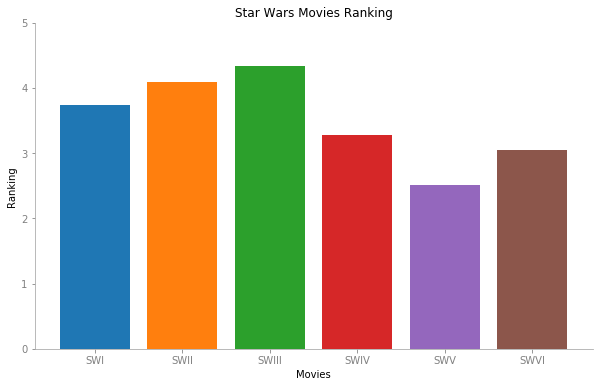

In [14]:
%matplotlib inline
import matplotlib.colors as mcolors
names = ['SWI', 'SWII', 'SWIII', 'SWIV', 'SWV', 'SWVI']
fig, ax = plt.subplots(figsize=(10,6),facecolor='white')
ax.bar(names, mean_rank, color=mcolors.TABLEAU_COLORS)
ax.set_ylim(0,5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('darkgrey')
ax.spines['bottom'].set_color('darkgrey')
ax.tick_params(axis='both', colors='grey')
ax.set_xlabel('Movies')
ax.set_ylabel('Ranking')
ax.set_title('Star Wars Movies Ranking')
plt.show()

By looking at the bar chart of the ranking, it shows that the oldest movies have a higher ranking by the surveyed people, which is in agreement with the general perception. Also, the 'Empire Strikes Back' is the best ranked movie in the saga, with an average of 2.5.

Note: The ranking is based on 1 as the favorite movie of a person and 6 the least favorite. So, a lower ranking is better. 


### General Most Watched Movie

Let's see which movie of the saga is the most watched.

In [15]:
sum_watch = star_wars.iloc[:,3:9].sum()
sum_watch.sort_values(ascending=False)

Seen_SWV      758
Seen_SWVI     738
Seen_SWI      673
Seen_SWIV     607
Seen_SWII     571
Seen_SWIII    550
dtype: int64

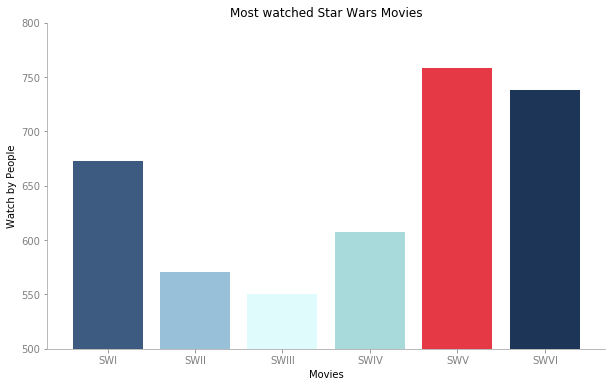

In [16]:
names = ['SWI', 'SWII', 'SWIII', 'SWIV', 'SWV', 'SWVI']
fig, ax = plt.subplots(figsize=(10,6),facecolor='white')
ax.bar(names, sum_watch, color=['#3d5a80','#98c1d9','#e0fbfc','#a8dadc','#e63946','#1d3557'])
ax.set_ylim(500,800)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('darkgrey')
ax.spines['bottom'].set_color('darkgrey')
ax.tick_params(axis='both', colors='grey')
ax.set_xlabel('Movies')
ax.set_ylabel('Watch by People')
ax.set_title('Most watched Star Wars Movies')
plt.show()

The most watched movie of the Star Wars Saga is 'SWV: Empire Strikes Back', this makes sense as this is the best ranked movie in the saga. The least watched movie is 'SWIII: The revenge of the Sith' and also has the lowest ranking. This indicates that there is a correlation between the ranking and the number of people that has watched the movie.  


#### Ranking Fans vs No Fans
Let's analyze how are the rankings by the people that are considered fans of the Star Wars Saga and people that not. 

In [17]:
fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
no_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] != True]

In [18]:
rank_fans = fans.iloc[:,9:15].mean()
rank_no_fans = no_fans.iloc[:,9:15].mean()


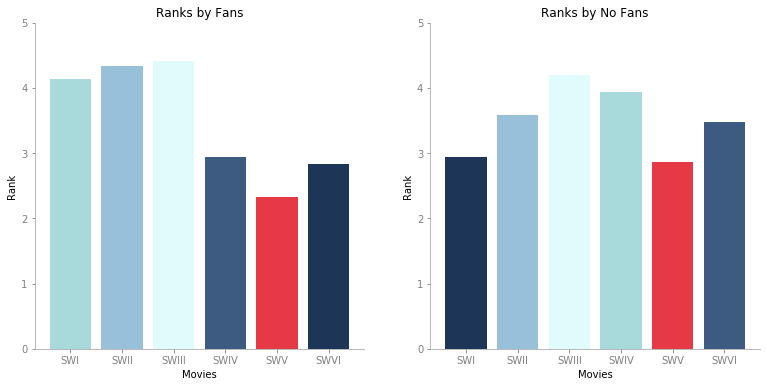

In [19]:
names = ['SWI', 'SWII', 'SWIII', 'SWIV', 'SWV', 'SWVI']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,6),facecolor='white')
fn = [rank_fans, rank_no_fans]
for i in range(0,2):
    if i == 0:
        ax[i].bar(names, fn[i], color=['#a8dadc','#98c1d9','#e0fbfc','#3d5a80','#e63946','#1d3557'])
    elif i == 1:
        ax[i].bar(names, fn[i], color=['#1d3557','#98c1d9','#e0fbfc','#a8dadc','#e63946','#3d5a80'])
    ax[i].set_ylim(0,5)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_color('darkgrey')
    ax[i].spines['bottom'].set_color('darkgrey')
    ax[i].tick_params(axis='both', colors='grey')
    ax[i].set_xlabel('Movies')
    ax[i].set_ylabel('Rank')
ax[0].set_title('Ranks by Fans')
ax[1].set_title('Ranks by No Fans')
plt.show()

Some insights can be derived from the bar charts:
* The 'SWV: Empire Strikes Back' has the highest ranking no matter if the persons consider themselves fans or not. 
* The 'SWIII: The revenge of the Sith' has the lowest ranking for fans and not fans. 
* There is a big difference in the trends of the rankings from fans to not fans. For fans there is a clear distinction between the old trilogy (higher rankings) and the new trilogy (lower rankings). In the other hand, for the no fans the rankings are more spread and there is not clear distinction between trilogies.

#### Most Watched Movie Fans vs No Fans
Now, let's compare the views of the movies by fans and no fans. 

In [20]:
watch_fans = fans.iloc[:,3:9].sum()
watch_no_fans = no_fans.iloc[:,3:9].sum()

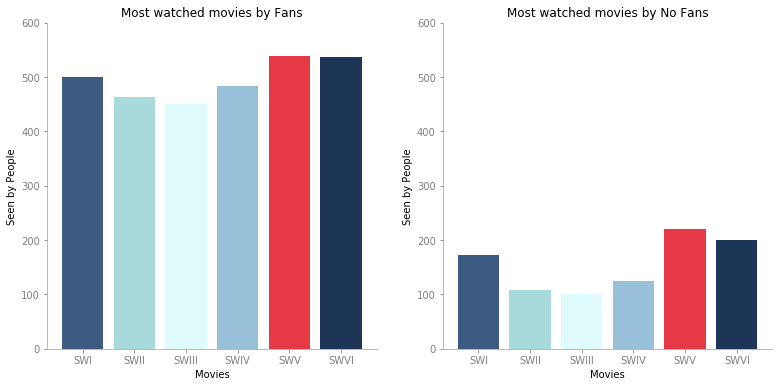

In [21]:
names = ['SWI', 'SWII', 'SWIII', 'SWIV', 'SWV', 'SWVI']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,6),facecolor='white')
fn = [watch_fans, watch_no_fans]
for i in range(0,2):
    if i == 0:
        ax[i].bar(names, fn[i], color=['#3d5a80','#a8dadc','#e0fbfc','#98c1d9','#e63946','#1d3557'])
    elif i == 1:
        ax[i].bar(names, fn[i], color=['#3d5a80','#a8dadc','#e0fbfc','#98c1d9','#e63946','#1d3557'])
    ax[i].set_ylim(0,600)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_color('darkgrey')
    ax[i].spines['bottom'].set_color('darkgrey')
    ax[i].tick_params(axis='both', colors='grey')
    ax[i].set_xlabel('Movies')
    ax[i].set_ylabel('Seen by People')
ax[0].set_title('Most watched movies by Fans')
ax[1].set_title('Most watched movies by No Fans')
plt.show()

Some insights can be derived from the bar chars:
* The people that is considered a Fan have watched a lot more Star Wars movies than the no fans.
* Most Star Wars fans have seen all the six movies of the saga.
* 'SWV: The Empire Strikes Back' is the most watched movie with the fans and no fans. 


## Conclusion
By looking to the analysis of this data, it is clear that the best movie in the opinion of the people surveyed is Star Wars V: The Empire Strikes Back. This movie is also the most watched movie, either by fans or no fans. 

The worst movie is Star Wars III: The Revenge of the Sith and it is also the least watched movie of the two trilogies. 